In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

test_dir="./case_data/BikeRentalDaily_test.csv"
train_dir="./case_data/clean_training_data.csv"


test_contents = pd.read_csv(test_dir, sep=';')
test_contents = test_contents.dropna()


train_contents = pd.read_csv(train_dir, sep=';')
train_contents = train_contents.dropna()

# This is used to store the mean absolute errors together with the calculation
# algorithm in the form [method, mean_absolute_error]. Later in this section
# this is used to generate a visual overview of the results
results_method_mae = []


feature_cols = ["instant","season","yr","mnth","weathersit","temp","atemp","hum","windspeed"]

X = train_contents.loc[:, feature_cols]
y = train_contents.cnt

X_test = test_contents.loc[:, feature_cols]
y_test = test_contents.cnt

print(test_contents.head())
# print(train_contents.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0      299  26.10.2011     4.0   0    10        0        3           1   
1      458  02.04.2012     2.0   1     4        0        1           1   
2      687  17.11.2012     4.0   1    11        0        6           0   
4      291  18.10.2011     4.0   0    10        0        2           1   
5       53  22.02.2011     1.0   0     2        0        2           1   

   weathersit     temp     atemp        hum  windspeed  leaflets  \
0           2  19.3667  0.472846  108.06255   0.148642       605   
1           1  17.3565  0.427513   75.65220   0.312139       518   
2           1  13.0000  0.326383   81.81255   0.179729       766   
4           2  21.3000  0.522721  105.25005   0.110087       463   
5           1   7.2889  0.186033   86.66670   0.195683       516   

   price reduction  casual  registered   cnt  
0                0     404        3490  3894  
1                0    1208        4728  5936  
2    

In [2]:


linreg = LinearRegression()

linreg.fit(X,y)


pred = linreg.predict(X_test)

linreg.score(X_test, y_test)

0.38482880912777917

In [3]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, pred)
print('MAE: %.3f' % mae)

results_method_mae.append(["linear regression", mae])

MAE: 887.670


In [4]:

pipe = make_pipeline(StandardScaler(), HuberRegressor())

pipe.fit(X,y)


pred = pipe.predict(X_test)

mae = mean_absolute_error(y_test, pred)
print('MAE: %.3f' % mae)

results_method_mae.append(["Huber Regressor", mae])

pipe.score(X_test, y_test)

MAE: 855.780


0.3923970510159551

In [5]:

degree=4

polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)


pred = polyreg.predict(X_test)

mae = mean_absolute_error(y_test, pred)
print('MAE: %.3f' % mae)

results_method_mae.append(["polynominal regression degree=4", mae])

polyreg.score(X_test, y_test)



degree=3

polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)


pred = polyreg.predict(X_test)

mae = mean_absolute_error(y_test, pred)
print('MAE: %.3f' % mae)

results_method_mae.append(["polynominal regression degree=3", mae])

polyreg.score(X_test, y_test)

MAE: 393.258
MAE: 625.733


0.05874835944622958

In [6]:
from sklearn.neighbors import KNeighborsRegressor


#Initialize and fit KNN regression
KNN_reg = KNeighborsRegressor(n_neighbors=20)
KNN_reg.fit(X, y)

#Predict all test examples
ypred = KNN_reg.predict(X_test)

mae = mean_absolute_error(y_test, ypred)
print('MAE: %.3f' % mae)

results_method_mae.append(["KNN n_neighbors=20", mae])
KNN_reg.score(X_test, y_test)



#Initialize and fit KNN regression
KNN_reg = KNeighborsRegressor(n_neighbors=1)
KNN_reg.fit(X, y)

#Predict all test examples
ypred = KNN_reg.predict(X_test)

mae = mean_absolute_error(y_test, ypred)
print('MAE: %.3f' % mae)

results_method_mae.append(["KNN n_neighbors=1", mae])
KNN_reg.score(X_test, y_test)

MAE: 1009.264
MAE: 319.217


0.47782106469363406

In [7]:

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='poly', degree=1))
clf.fit(X, y)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

ypred = clf.predict(X_test)
mae = mean_absolute_error(y_test, ypred)
print('MAE: %.3f' % mae)

results_method_mae.append(["Support Vector Classification degree=1", mae])
clf.score(X_test, y_test)


clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='poly', degree=2))
clf.fit(X, y)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

ypred = clf.predict(X_test)
mae = mean_absolute_error(y_test, ypred)
print('MAE: %.3f' % mae)

results_method_mae.append(["Support Vector Classification degree=2", mae])
clf.score(X_test, y_test)

MAE: 329.365
MAE: 349.513


0.8608695652173913

In [8]:
df_results = pd.DataFrame(results_method_mae, columns = ['Method', 'MAE'])

# Show results of methods
df_results

,Method,MAE
0,linear regression,887.669590
1,Huber Regressor,855.779866
2,polynominal regression degree=4,393.257799
3,polynominal regression degree=3,625.733193
4,KNN n_neighbors=20,1009.263913
5,KNN n_neighbors=1,319.217391
6,Support Vector Classification degree=1,329.365217
7,Support Vector Classification degree=2,349.513043


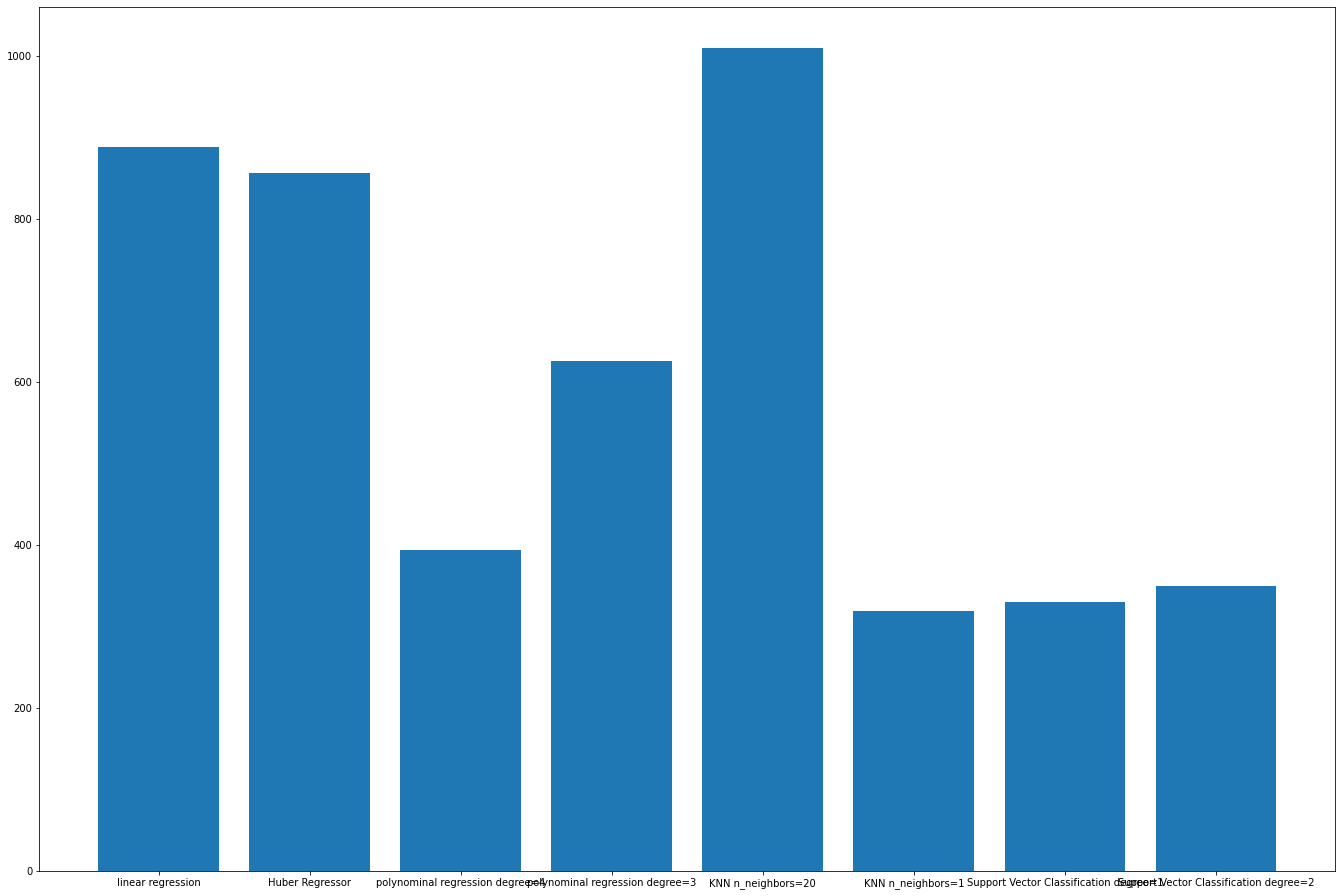

In [11]:
import matplotlib.pyplot as plt

# Visualize resuts of data frame

fig = plt.figure()
ax = fig.add_axes([0,0,3,3])

ax.bar(df_results.Method,df_results.MAE)
plt.show()

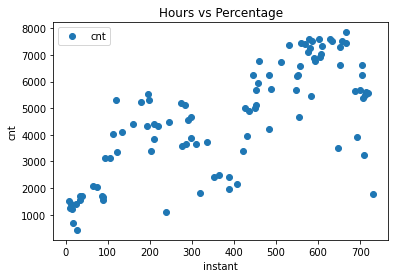

In [10]:
x_plot = 'instant'

train_contents.plot(x=x_plot, y='cnt', style='o')
plt.title('Hours vs Percentage')
plt.xlabel(x_plot)
plt.ylabel('cnt')
plt.show()
